# N-Year Storms by Season
Investigate the disparity of n-year storms across the seasons across the years.  The Chicago Climate Action Plan discusses how there should be more heavy storms in winter and spring, and less in summer.  This notebook seeks to see if this is happening.

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pandas as pd
from datetime import datetime, timedelta, date
import operator
import matplotlib.pyplot as plt
import numpy as np
from collections import namedtuple
%matplotlib inline

In [2]:
year_list = [year for year in range(1970, 2017)]

In [3]:
n_year_storms = pd.read_csv('data/n_year_storms_ohare_noaa.csv')
n_year_storms['start_time'] = pd.to_datetime(n_year_storms['start_time'])
n_year_storms['end_time'] = pd.to_datetime(n_year_storms['end_time'])
n_year_storms.head()

,n,duration_hrs,start_time,end_time,inches,year
0,100,240,1987-08-11 23:00:00,1987-08-21 23:00:00,13.55,1987
1,100,240,2008-09-04 13:00:00,2008-09-14 13:00:00,11.94,2008
2,100,24,2011-07-22 08:00:00,2011-07-23 08:00:00,7.86,2011
3,50,24,2010-07-23 16:00:00,2010-07-24 16:00:00,6.54,2010
4,50,3,2001-08-30 21:00:00,2001-08-31 00:00:00,4.27,2001


In [4]:
# Get the season of each event based on the start date
# This code is copied from http://stackoverflow.com/questions/16139306/determine-season-given-timestamp-in-python-using-datetime

Y = 2000 # dummy leap year to allow input X-02-29 (leap day)
seasons = [('winter', (date(Y,  1,  1),  date(Y,  3, 20))),
           ('spring', (date(Y,  3, 21),  date(Y,  6, 20))),
           ('summer', (date(Y,  6, 21),  date(Y,  9, 22))),
           ('autumn', (date(Y,  9, 23),  date(Y, 12, 20))),
           ('winter', (date(Y, 12, 21),  date(Y, 12, 31)))]

def get_season(timestamp):
    if isinstance(timestamp, datetime):
        timestamp = timestamp.date()
    timestamp = timestamp.replace(year=Y)
    return next(season for season, (start, end) in seasons
                if start <= timestamp <= end)

n_year_storms['season'] = n_year_storms['start_time'].apply(get_season)
n_year_storms.head()

,n,duration_hrs,start_time,end_time,inches,year,season
0,100,240,1987-08-11 23:00:00,1987-08-21 23:00:00,13.55,1987,summer
1,100,240,2008-09-04 13:00:00,2008-09-14 13:00:00,11.94,2008,summer
2,100,24,2011-07-22 08:00:00,2011-07-23 08:00:00,7.86,2011,summer
3,50,24,2010-07-23 16:00:00,2010-07-24 16:00:00,6.54,2010,summer
4,50,3,2001-08-30 21:00:00,2001-08-31 00:00:00,4.27,2001,summer


In [5]:
# How often do N-Year Storms happen per season?
n_year_storms['season'].value_counts()

summer    52
autumn    14
spring    13
winter     4
Name: season, dtype: int64

In [6]:
n_year_storms[n_year_storms['n'] >= 10]

,n,duration_hrs,start_time,end_time,inches,year,season
0,100,240,1987-08-11 23:00:00,1987-08-21 23:00:00,13.55,1987,summer
1,100,240,2008-09-04 13:00:00,2008-09-14 13:00:00,11.94,2008,summer
2,100,24,2011-07-22 08:00:00,2011-07-23 08:00:00,7.86,2011,summer
3,50,24,2010-07-23 16:00:00,2010-07-24 16:00:00,6.54,2010,summer
4,50,3,2001-08-30 21:00:00,2001-08-31 00:00:00,4.27,2001,summer
5,25,18,2013-04-17 14:00:00,2013-04-18 08:00:00,5.16,2013,spring
6,25,2,1997-07-18 14:00:00,1997-07-18 16:00:00,3.38,1997,summer
7,10,240,2002-08-12 14:00:00,2002-08-22 14:00:00,7.32,2002,summer
8,10,240,1990-08-11 23:00:00,1990-08-21 23:00:00,6.96,1990,summer
9,10,120,1978-09-13 01:00:00,1978-09-18 01:00:00,6.00,1978,summer


#### We can see that all 100-, 50-, 25, and 10- year events happened in the summer time.  One 25-year and one 10-year event happened in other seasons.  The 10-year event was a long time ago.

### The smaller storms are more varied, so let's take a look at when they happen.

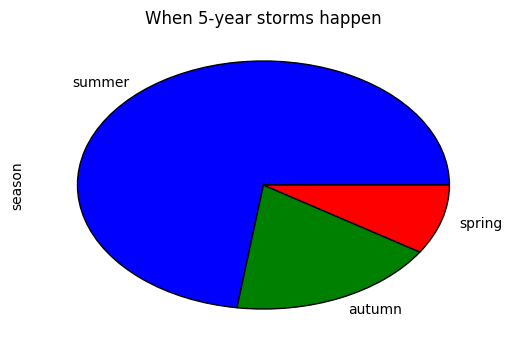

In [7]:
n_year_storms[n_year_storms['n'] == 5]['season'].value_counts().plot(kind="pie", title='When 5-year storms happen')

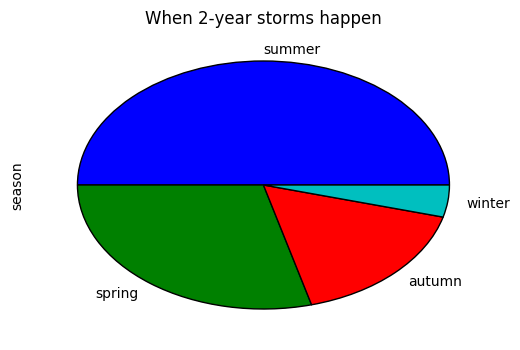

In [8]:
n_year_storms[n_year_storms['n'] == 2]['season'].value_counts().plot(kind="pie", title='When 2-year storms happen')

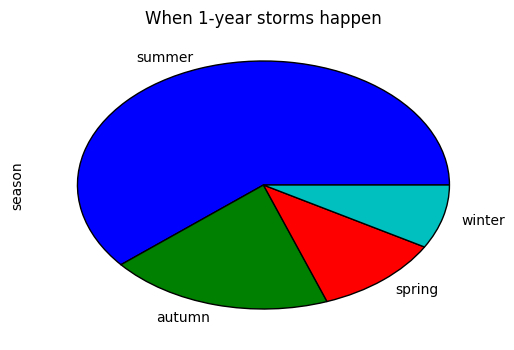

In [9]:
n_year_storms[n_year_storms['n'] == 1]['season'].value_counts().plot(kind="pie", title='When 1-year storms happen')

In [10]:
smaller_storms = n_year_storms[n_year_storms['n'] <= 5]
smaller_storms_by_season = {year: {season: 0 for season in list(smaller_storms['season'].unique())} for year in year_list}
for index, storm in smaller_storms.iterrows():
    smaller_storms_by_season[storm['year']][storm['season']] += 1

smaller_storms_by_season = pd.DataFrame(smaller_storms_by_season).transpose()
smaller_storms_by_season.head()

,autumn,spring,summer,winter
1970,0,0,0,0
1971,0,0,2,0
1972,0,0,1,0
1973,0,0,0,0
1974,0,0,0,0


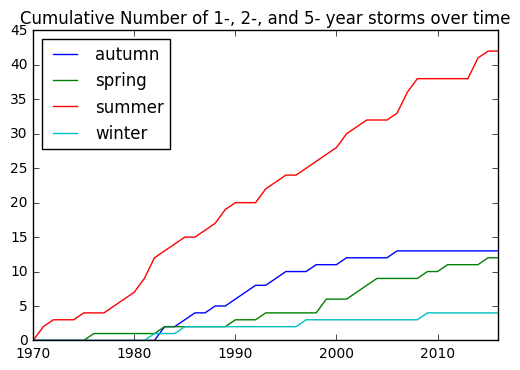

In [11]:
smaller_storms_by_season.cumsum().plot(kind='line', title='Cumulative Number of 1-, 2-, and 5- year storms over time')

#### Compare that to the same chart with all storms

In [12]:
storms_by_season = {year: {season: 0 for season in list(n_year_storms['season'].unique())} for year in year_list}
for index, storm in n_year_storms.iterrows():
    storms_by_season[storm['year']][storm['season']] += 1

storms_by_season = pd.DataFrame(storms_by_season).transpose()
storms_by_season.head()

,autumn,spring,summer,winter
1970,0,0,0,0
1971,0,0,2,0
1972,0,0,1,0
1973,0,0,0,0
1974,0,0,0,0


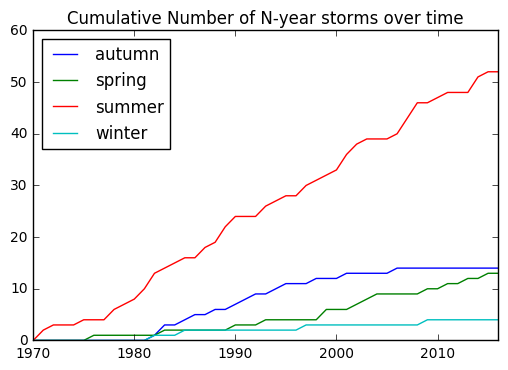

In [13]:
storms_by_season.cumsum().plot(kind='line', title='Cumulative Number of N-year storms over time')

#### The graphs for all N-Year Storms and smaller storms don't look all that different.  A few observations.
* Summer storms seem steady
* Spring and Autumn storms happened more in the 80's and 90's.
* It was a while in the dataset until there were any n-year storms not in the summer

In [14]:
# Curious about when we had the first n-year storm in each season
n_year_storms[n_year_storms['season'] != 'summer'].sort_values('year')

,n,duration_hrs,start_time,end_time,inches,year,season
59,1,120,1976-04-20 19:00:00,1976-04-25 19:00:00,3.32,1976,spring
77,1,3,1982-12-24 20:00:00,1982-12-24 23:00:00,1.64,1982,winter
10,10,72,1982-12-02 02:00:00,1982-12-05 02:00:00,5.20,1982,autumn
47,1,240,1983-03-31 16:00:00,1983-04-10 16:00:00,4.61,1983,spring
30,2,120,1983-11-23 02:00:00,1983-11-28 02:00:00,4.04,1983,autumn
36,2,24,1983-10-21 19:00:00,1983-10-22 19:00:00,3.10,1983,autumn
53,1,240,1985-10-31 16:00:00,1985-11-10 16:00:00,4.34,1985,autumn
49,1,240,1985-02-22 13:00:00,1985-03-04 13:00:00,4.51,1985,winter
24,2,240,1986-09-24 14:00:00,1986-10-04 14:00:00,5.76,1986,autumn
19,5,12,1988-10-17 09:00:00,1988-10-17 21:00:00,3.42,1988,autumn


* First autumn n-year storm was in 1982
* First winter n-year storm was in 1982
* First spring n-year storm was in 1976

In [15]:
n_year_storms[n_year_storms['season'] == 'autumn']

,n,duration_hrs,start_time,end_time,inches,year,season
10,10,72,1982-12-02 02:00:00,1982-12-05 02:00:00,5.20,1982,autumn
17,5,72,2001-10-11 19:00:00,2001-10-14 19:00:00,4.50,2001,autumn
19,5,12,1988-10-17 09:00:00,1988-10-17 21:00:00,3.42,1988,autumn
24,2,240,1986-09-24 14:00:00,1986-10-04 14:00:00,5.76,1986,autumn
30,2,120,1983-11-23 02:00:00,1983-11-28 02:00:00,4.04,1983,autumn
34,2,48,2006-11-29 09:00:00,2006-12-01 09:00:00,3.44,2006,autumn
36,2,24,1983-10-21 19:00:00,1983-10-22 19:00:00,3.10,1983,autumn
51,1,240,1994-10-30 17:00:00,1994-11-09 17:00:00,4.43,1994,autumn
53,1,240,1985-10-31 16:00:00,1985-11-10 16:00:00,4.34,1985,autumn
60,1,72,1991-10-02 09:00:00,1991-10-05 09:00:00,3.16,1991,autumn


Only two autumn n-year storms since 1998.  It's been 10 years since the last one

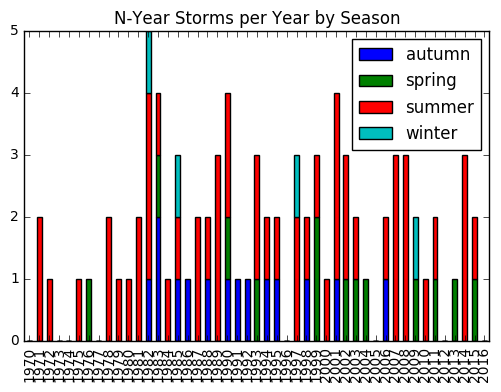

In [16]:
storms_by_season.plot(kind='bar', stacked=True, title='N-Year Storms per Year by Season')